In [1]:
# Import packages
import pandas as mypd
import numpy as mynp
import matplotlib.pyplot as myplot
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay

In [2]:
#import data file
mydata=mypd.read_csv("churn_rate.csv")
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

In [3]:
#Drop Unwanted colomns
mydata.drop(["customer_id","phone_no","year"],axis=1, inplace = True)
mydata = mydata.dropna(subset=['churn'])
mydata.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  1941 non-null   object 
 1   age                     1965 non-null   int64  
 2   no_of_days_subscribed   1965 non-null   int64  
 3   multi_screen            1965 non-null   object 
 4   mail_subscribed         1965 non-null   object 
 5   weekly_mins_watched     1965 non-null   float64
 6   minimum_daily_mins      1965 non-null   float64
 7   maximum_daily_mins      1965 non-null   float64
 8   weekly_max_night_mins   1965 non-null   int64  
 9   videos_watched          1965 non-null   int64  
 10  maximum_days_inactive   1939 non-null   float64
 11  customer_support_calls  1965 non-null   int64  
 12  churn                   1965 non-null   float64
dtypes: float64(5), int64(5), object(3)
memory usage: 214.9+ KB


In [4]:
#convert the categrogical data into numerical
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
mydata["multi_screen"] = lb_make.fit_transform(mydata["multi_screen"])
mydata["mail_subscribed"] = lb_make.fit_transform(mydata["mail_subscribed"])
mydata['gender'].replace(['Female', 'Male'],
                        [0, 1], inplace=True)
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  1941 non-null   float64
 1   age                     1965 non-null   int64  
 2   no_of_days_subscribed   1965 non-null   int64  
 3   multi_screen            1965 non-null   int32  
 4   mail_subscribed         1965 non-null   int32  
 5   weekly_mins_watched     1965 non-null   float64
 6   minimum_daily_mins      1965 non-null   float64
 7   maximum_daily_mins      1965 non-null   float64
 8   weekly_max_night_mins   1965 non-null   int64  
 9   videos_watched          1965 non-null   int64  
 10  maximum_days_inactive   1939 non-null   float64
 11  customer_support_calls  1965 non-null   int64  
 12  churn                   1965 non-null   float64
dtypes: float64(6), int32(2), int64(5)
memory usage: 199.6 KB


In [5]:
#KNN imputation
from sklearn.impute import KNNImputer
knn= KNNImputer(n_neighbors=4)
data= knn.fit_transform(mydata)
# Making the cleaned as a dataframeobject
mydata= mypd.DataFrame(data, columns= mydata.columns)
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965 entries, 0 to 1964
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  1965 non-null   float64
 1   age                     1965 non-null   float64
 2   no_of_days_subscribed   1965 non-null   float64
 3   multi_screen            1965 non-null   float64
 4   mail_subscribed         1965 non-null   float64
 5   weekly_mins_watched     1965 non-null   float64
 6   minimum_daily_mins      1965 non-null   float64
 7   maximum_daily_mins      1965 non-null   float64
 8   weekly_max_night_mins   1965 non-null   float64
 9   videos_watched          1965 non-null   float64
 10  maximum_days_inactive   1965 non-null   float64
 11  customer_support_calls  1965 non-null   float64
 12  churn                   1965 non-null   float64
dtypes: float64(13)
memory usage: 199.7 KB


In [6]:
mydata.head(30)

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0.00,36.0,62.0,0.0,0.0,148.35,12.2,16.81,82.0,1.0,4.00,1.0,0.0
1,0.00,39.0,149.0,0.0,0.0,294.45,7.7,33.37,87.0,3.0,3.00,2.0,0.0
2,0.00,65.0,126.0,0.0,0.0,87.30,11.9,9.89,91.0,1.0,4.00,5.0,1.0
3,0.00,24.0,131.0,0.0,1.0,321.30,9.5,36.41,102.0,4.0,3.00,3.0,0.0
4,0.00,40.0,191.0,0.0,0.0,243.00,10.9,27.54,83.0,7.0,3.00,1.0,0.0
5,0.25,31.0,65.0,0.0,0.0,193.65,12.7,21.95,111.0,6.0,4.00,4.0,1.0
6,1.00,54.0,59.0,0.0,0.0,239.25,10.2,27.12,106.0,4.0,3.25,0.0,0.0
7,0.00,40.0,50.0,0.0,0.0,196.65,5.6,22.29,88.0,9.0,3.50,5.0,1.0
8,1.00,61.0,205.0,0.0,1.0,263.70,7.8,29.89,64.0,5.0,3.00,2.0,0.0
9,1.00,31.0,63.0,0.0,0.0,316.80,12.3,35.90,58.0,2.0,4.00,0.0,0.0


In [7]:
# Synthetic Minority Oversampling Technique, or SMOTE
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
# Separating the target variable
X = mydata.iloc[:, 0:12]
Y = mydata.iloc[:, 12]
# Splitting the dataset into train and test
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
#X, Y = oversample.fit_resample(X, Y)
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0)))
sm = SMOTE(random_state = 2)
X_train_r, Y_train_r = sm.fit_resample(X_train, Y_train.ravel())
print('After OverSampling, the shape of train_X: {}'.format(X_train_r.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(Y_train_r.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(Y_train_r == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_r == 0)))

Before OverSampling, counts of label '1': 213
Before OverSampling, counts of label '0': 1359 

After OverSampling, the shape of train_X: (2718, 12)
After OverSampling, the shape of train_y: (2718,) 

After OverSampling, counts of label '1': 1359
After OverSampling, counts of label '0': 1359


In [8]:
# Function to perform training with random forest classifier.
def tarin_using_rfc(X,Y,n_est):
    rfc = RandomForestClassifier(n_estimators=n_est, random_state=100)
    # fit the model
    rfc.fit(X, Y)
    return rfc

In [9]:
# Function to make predictions
def prediction(X_test, clf_object):
    # Predicton on test 
    y_pred = clf_object.predict(X_test)
    return y_pred

In [10]:
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))  
    print ("Accuracy : ",accuracy_score(y_test,y_pred)*100) 
    print("Report : ",classification_report(y_test, y_pred))

Results with RFC after SMOTE
Confusion Matrix:  [[333  11]
 [ 21  28]]
Accuracy :  91.85750636132316
Report :                precision    recall  f1-score   support

         0.0       0.94      0.97      0.95       344
         1.0       0.72      0.57      0.64        49

    accuracy                           0.92       393
   macro avg       0.83      0.77      0.80       393
weighted avg       0.91      0.92      0.91       393



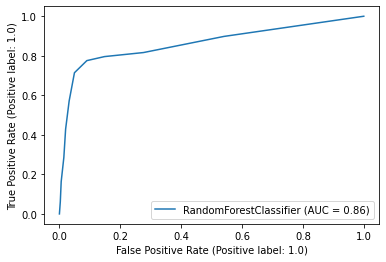

In [11]:
#With SMOTE
clf_rfc = tarin_using_rfc(X_train_r, Y_train_r,10)
print("Results with RFC after SMOTE")
y_pred_rfc = prediction(X_test, clf_rfc)
cal_accuracy(Y_test, y_pred_rfc)
RocCurveDisplay.from_estimator(clf_rfc, X_test, Y_test)
myplot.show()

Results with RFC without SMOTE
Confusion Matrix:  [[339   5]
 [ 24  25]]
Accuracy :  92.6208651399491
Report :                precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       344
         1.0       0.83      0.51      0.63        49

    accuracy                           0.93       393
   macro avg       0.88      0.75      0.80       393
weighted avg       0.92      0.93      0.92       393



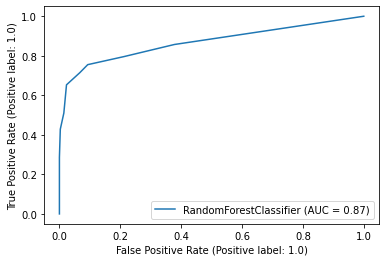

In [12]:
#Withoot SMOTE
clf_rfc = tarin_using_rfc(X_train, Y_train,10)
print("Results with RFC without SMOTE")
y_pred_rfc = prediction(X_test, clf_rfc)
cal_accuracy(Y_test, y_pred_rfc)
RocCurveDisplay.from_estimator(clf_rfc, X_test, Y_test)
myplot.show()

In [13]:
# Function to perform SVM
def train_using_svc(X,Y,X_t,y_t,par):
    svc=SVC(kernel=par)
    clf_svc = svc.fit(X,Y)
    y_pred = clf_svc.predict(X_t)
    print("Confusion Matrix: ",confusion_matrix(y_t, y_pred))  
    print ("Accuracy : ",accuracy_score(Y_test,y_pred)*100) 
    print("Report : ",classification_report(Y_test, y_pred))

In [14]:
list=['rbf','linear','poly','sigmoid']
for par in list:
      print("Using kernal with SMOTE",par)
      train_using_svc(X_train_r,Y_train_r,X_test,Y_test,par)

Using kernal with SMOTE rbf
Confusion Matrix:  [[296  48]
 [ 22  27]]
Accuracy :  82.1882951653944
Report :                precision    recall  f1-score   support

         0.0       0.93      0.86      0.89       344
         1.0       0.36      0.55      0.44        49

    accuracy                           0.82       393
   macro avg       0.65      0.71      0.66       393
weighted avg       0.86      0.82      0.84       393

Using kernal with SMOTE linear
Confusion Matrix:  [[259  85]
 [ 11  38]]
Accuracy :  75.57251908396947
Report :                precision    recall  f1-score   support

         0.0       0.96      0.75      0.84       344
         1.0       0.31      0.78      0.44        49

    accuracy                           0.76       393
   macro avg       0.63      0.76      0.64       393
weighted avg       0.88      0.76      0.79       393

Using kernal with SMOTE poly
Confusion Matrix:  [[308  36]
 [ 24  25]]
Accuracy :  84.7328244274809
Report :                

In [15]:
acc_score=[]
for c in mynp.arange(0.1,4,0.1):
    svc = SVC(kernel='poly', C=c)
    clf_svc = svc.fit(X_train_r,Y_train_r)
    y_pred = clf_svc.predict(X_test)
    cc_score=accuracy_score(Y_test,y_pred)*100
    acc_score.append(cc_score)
print(acc_score)

[83.96946564885496, 84.22391857506362, 84.47837150127226, 84.7328244274809, 84.22391857506362, 84.47837150127226, 84.7328244274809, 84.7328244274809, 84.7328244274809, 84.7328244274809, 84.47837150127226, 84.22391857506362, 83.7150127226463, 83.7150127226463, 83.7150127226463, 83.46055979643766, 83.46055979643766, 83.20610687022901, 82.95165394402035, 83.20610687022901, 83.20610687022901, 83.46055979643766, 83.46055979643766, 83.46055979643766, 83.46055979643766, 83.96946564885496, 83.96946564885496, 83.96946564885496, 83.7150127226463, 83.7150127226463, 83.7150127226463, 83.7150127226463, 83.7150127226463, 83.7150127226463, 82.95165394402035, 82.95165394402035, 82.95165394402035, 82.95165394402035, 82.95165394402035]


<function matplotlib.pyplot.show(close=None, block=None)>

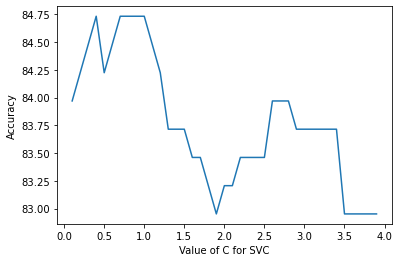

In [16]:
C_values=mynp.arange(0.1,4,0.1)
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
myplot.plot(C_values,acc_score)
myplot.xlabel('Value of C for SVC')
myplot.ylabel('Accuracy')
myplot.show

In [17]:
svc = SVC(kernel='poly', C=1)
clf_svc = svc.fit(X_train_r,Y_train_r)
y_pred = clf_svc.predict(X_test)
print("Confusion Matrix: ",confusion_matrix(Y_test, y_pred))  
print ("Accuracy : ",accuracy_score(Y_test,y_pred)*100) 
print("Report : ",classification_report(Y_test, y_pred))

Confusion Matrix:  [[308  36]
 [ 24  25]]
Accuracy :  84.7328244274809
Report :                precision    recall  f1-score   support

         0.0       0.93      0.90      0.91       344
         1.0       0.41      0.51      0.45        49

    accuracy                           0.85       393
   macro avg       0.67      0.70      0.68       393
weighted avg       0.86      0.85      0.85       393



In [18]:
#SMOTE on Whole data
X_r, Y_r = sm.fit_resample(X, Y.ravel())

 Result for Cross Validation with Scoring parameter accuracy
[0.6391730291403448, 0.6382932637444503, 0.6362378940750405, 0.6362378940750407, 0.6368244043389703, 0.6365311492070054, 0.6371180900952111, 0.6371180900952111, 0.6359433470702478, 0.6359433470702478, 0.6359433470702477, 0.6359433470702477, 0.6350627204258013, 0.6341820937813548, 0.6344757795375957, 0.6344757795375957, 0.6341820937813548, 0.6333010365126324, 0.6333010365126324, 0.6327145262487027, 0.6327145262487027, 0.6335951528931492, 0.63388883864939, 0.6341820937813548, 0.63388883864939, 0.6327140956244268, 0.632127154736221, 0.632126724111945, 0.6315393525994634, 0.6318330383557043, 0.6318330383557043, 0.6315393525994635, 0.632126724111945, 0.6324208404924619, 0.6324204098681858, 0.6324208404924619, 0.632127154736221, 0.6327140956244266, 0.6330077813806675, 0.6330082120049436, 0.6338888386493899, 0.633889269273666, 0.6335947222688731, 0.6335951528931492, 0.6344762101618716, 0.6344757795375956, 0.6338879774008379, 0.63388

<function matplotlib.pyplot.show(close=None, block=None)>

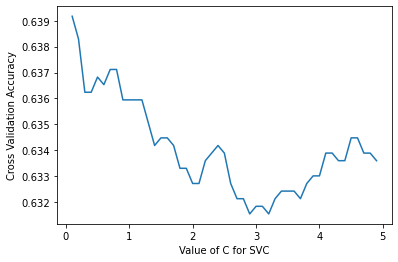

In [19]:
acc_cross_score=[]
for c in mynp.arange(0.1,5,0.1):
    svc = SVC(kernel='poly', C=c)
    scores = cross_val_score(svc,X_r,Y_r, cv=5, scoring='accuracy')
    acc_cross_score.append(scores.mean())
print (" Result for Cross Validation with Scoring parameter accuracy")
print(acc_cross_score)
C_values=mynp.arange(0.1,5,0.1)
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
myplot.plot(C_values,acc_cross_score)
myplot.xlabel('Value of C for SVC')
myplot.ylabel('Cross Validation Accuracy')
myplot.show

 Result for Cross Validation with Scoring parameter precision
[0.7571388553884502, 0.759854372861627, 0.7578604275520708, 0.7586698019566748, 0.7608112351258826, 0.7606673208304817, 0.7628796504145341, 0.7627098460586833, 0.7597575377203605, 0.7595985285475597, 0.7596228094426287, 0.7597928585271102, 0.7577266072030385, 0.7552529378428332, 0.7565232847683525, 0.7552926786288962, 0.7549939773301949, 0.7528811053354664, 0.7528811053354664, 0.7514614399701104, 0.7514614399701104, 0.7531987443826884, 0.7534173103471107, 0.7535544562157138, 0.752294681251308, 0.7499664024074837, 0.7484439666547602, 0.7483141408019396, 0.7471718799986894, 0.7480156777529914, 0.7480899037890285, 0.7466420861695989, 0.7477392812474598, 0.7486416317538069, 0.7486654639441017, 0.7486416317538069, 0.7483424341473878, 0.7493064759419031, 0.7501608787317898, 0.7494963427033383, 0.7503380989559835, 0.7504578213605756, 0.7489127538020858, 0.7484188064344602, 0.7497778428923704, 0.7493889927236941, 0.7481314694018495,

<function matplotlib.pyplot.show(close=None, block=None)>

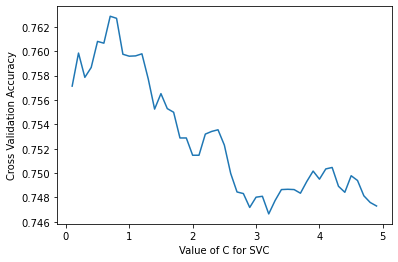

In [20]:
acc_cross_score=[]
for c in mynp.arange(0.1,5,0.1):
    svc = SVC(kernel='poly', C=c)
    scores = cross_val_score(svc,X_r,Y_r, cv=5, scoring='precision')
    acc_cross_score.append(scores.mean())
print (" Result for Cross Validation with Scoring parameter precision")
print(acc_cross_score)
C_values=mynp.arange(0.1,5,0.1)
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
myplot.plot(C_values,acc_cross_score)
myplot.xlabel('Value of C for SVC')
myplot.ylabel('Cross Validation Accuracy')
myplot.show

 Result for Cross Validation with Scoring parameter Recall
[0.411036743143005, 0.4057478005865103, 0.40222356391236846, 0.4010488183543212, 0.4004623080903916, 0.399875797826462, 0.39928928756253235, 0.39928928756253235, 0.39870105226841474, 0.39870105226841474, 0.39870105226841474, 0.39870105226841474, 0.3981145420044851, 0.3981145420044851, 0.3975263067103675, 0.39870277729860276, 0.3981145420044851, 0.3975263067103675, 0.3975263067103675, 0.3975263067103675, 0.3975263067103675, 0.39811109194410904, 0.3986976022080387, 0.3992858375021563, 0.39987234776608593, 0.39869587717785065, 0.39869587717785065, 0.39869587717785065, 0.398109366913921, 0.398109366913921, 0.398109366913921, 0.3986976022080387, 0.3992858375021563, 0.3992858375021563, 0.39928411247196827, 0.3992858375021563, 0.3986976022080387, 0.39928411247196827, 0.39928411247196827, 0.39987234776608593, 0.4016336035880628, 0.4016336035880628, 0.4022201138519924, 0.4028083491461101, 0.40398309470415733, 0.40456960496808697, 0.4039

<function matplotlib.pyplot.show(close=None, block=None)>

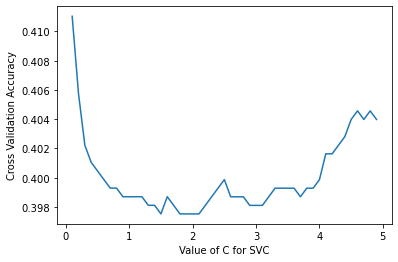

In [21]:
acc_cross_score=[]
for c in mynp.arange(0.1,5,0.1):
    svc = SVC(kernel='poly', C=c)
    scores = cross_val_score(svc,X_r,Y_r, cv=5, scoring='recall')
    acc_cross_score.append(scores.mean())
print (" Result for Cross Validation with Scoring parameter Recall")
print(acc_cross_score)
C_values=mynp.arange(0.1,5,0.1)
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
myplot.plot(C_values,acc_cross_score)
myplot.xlabel('Value of C for SVC')
myplot.ylabel('Cross Validation Accuracy')
myplot.show